In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import os


In [2]:
data_path = "/kaggle/input/shongket-bangla-sign-language-letter-dataset/Letter/"
classes = os.listdir(data_path)
images = []
labels = []

In [3]:
for class_label in classes:
    class_path = os.path.join(data_path, class_label)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))
        images.append(img)
        labels.append(int(class_label))

In [4]:
images = np.array(images)
labels = np.array(labels)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=10)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(classes), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:

datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')
datagen.fit(X_train)


In [10]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True)

model.fit(datagen.flow(X_train, y_train, batch_size=32),
          epochs=100,
          validation_data=(X_test, y_test),
          callbacks=[early_stopping])


Epoch 1/100
111/111 [==============================] - 14s 112ms/step - loss: 3.5852 - accuracy: 0.0296 - val_loss: 3.5800 - val_accuracy: 0.0169
Epoch 2/100
111/111 [==============================] - 11s 103ms/step - loss: 3.5749 - accuracy: 0.0412 - val_loss: 3.5935 - val_accuracy: 0.0384
Epoch 3/100
111/111 [==============================] - 11s 103ms/step - loss: 3.3772 - accuracy: 0.0976 - val_loss: 3.1623 - val_accuracy: 0.1332
Epoch 4/100
111/111 [==============================] - 12s 109ms/step - loss: 2.8977 - accuracy: 0.1837 - val_loss: 3.7175 - val_accuracy: 0.1659
Epoch 5/100
111/111 [==============================] - 11s 103ms/step - loss: 2.5184 - accuracy: 0.2593 - val_loss: 3.6951 - val_accuracy: 0.1749
Epoch 6/100
111/111 [==============================] - 11s 103ms/step - loss: 2.1771 - accuracy: 0.3318 - val_loss: 2.5520 - val_accuracy: 0.2810
Epoch 7/100
111/111 [==============================] - 11s 103ms/step - loss: 1.9414 - accuracy: 0.3995 - val_loss: 2.4379 -

In [ ]:
model.save("/kaggle/working/model_92%.h5")

In [11]:
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")

28/28 [==============================] - 1s 25ms/step - loss: 0.2466 - accuracy: 0.9052
Test Accuracy: 90.52%


28/28 [==============================] - 1s 25ms/step
Classification Report:
              precision    recall  f1-score   support

           অ       1.00      1.00      1.00        27
           আ       0.78      1.00      0.88        25
           ই       0.85      1.00      0.92        23
           উ       0.35      0.47      0.40        15
           এ       0.83      0.48      0.61        21
           ও       0.73      0.64      0.68        25
           ক       0.91      0.84      0.87        25
           খ       0.93      1.00      0.96        27
           গ       1.00      0.86      0.93        29
           ঘ       1.00      1.00      1.00        26
           চ       1.00      1.00      1.00        21
           ছ       0.93      0.96      0.94        26
           জ       1.00      0.89      0.94        37
           ঝ       1.00      1.00      1.00        26
           ট       1.00      1.00      1.00        26
           ঠ       1.00      1.00      1.00        22
    

/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 2437 (\N{BENGALI LETTER A}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 2438 (\N{BENGALI LETTER AA}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 2439 (\N{BENGALI LETTER I}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 2441 (\N{BENGALI LETTER U}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 2447 (\N{BENGALI LETTER E}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: 

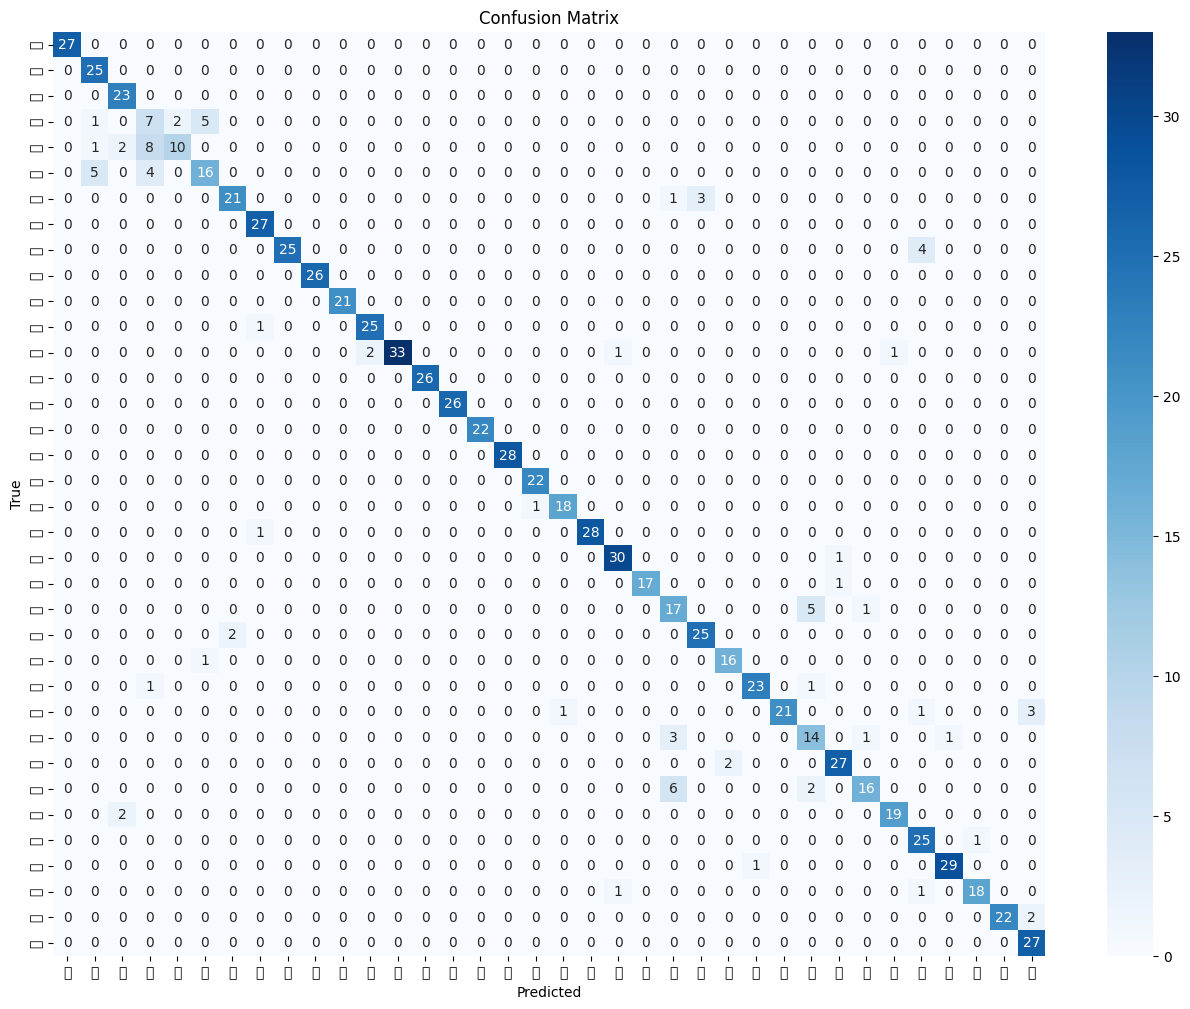

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Predict labels for all test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=[bangla_letters[i] for i in range(len(bangla_letters))]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[bangla_letters[i] for i in range(len(bangla_letters))],
            yticklabels=[bangla_letters[i] for i in range(len(bangla_letters))])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [13]:
bangla_letters = {
    0: "অ",
    1: "আ",
    2: "ই",
    3: "উ",
    4: "এ",
    5: "ও",
    6: "ক",
    7: "খ",
    8: "গ",
    9: "ঘ",
    10: "চ",
    11: "ছ",
    12: "জ",
    13: "ঝ",
    14: "ট",
    15: "ঠ",
    16: "ড",
    17: "ঢ",
    18: "ত",
    19: "থ",
    20: "দ",
    21: "ধ",
    22: "ন",
    23: "প",
    24: "ফ",
    25: "ব",
    26: "ভ",
    27: "ম",
    28: "য়",
    29: "র",
    30: "ল",
    31: "স",
    32: "হ",
    33: "ড়",
    34: "ং",
    35: "ঃ",
}


1/1 [==============================] - 0s 28ms/step
Sample 1: True Label: গ, Predicted Label: গ


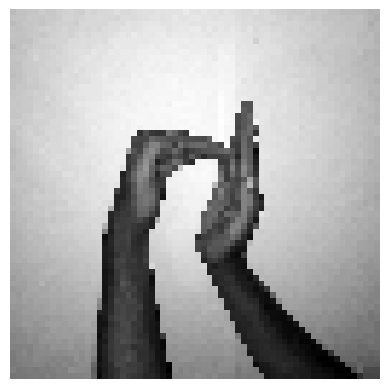

-----
Sample 2: True Label: ঘ, Predicted Label: ঘ


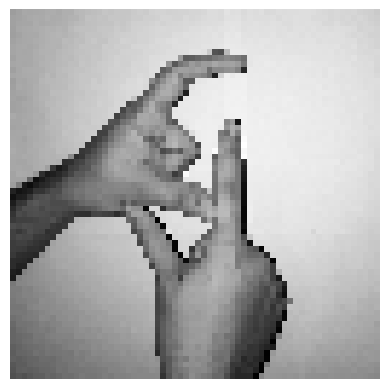

-----
Sample 3: True Label: হ, Predicted Label: হ


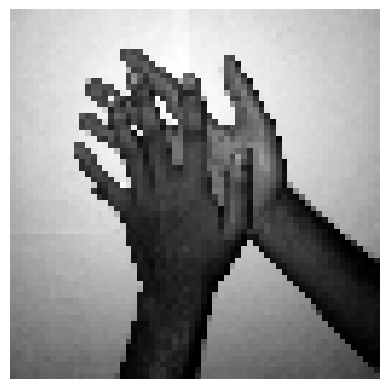

-----
Sample 4: True Label: জ, Predicted Label: জ


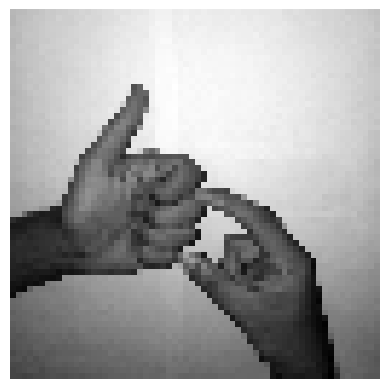

-----
Sample 5: True Label: ঝ, Predicted Label: ঝ


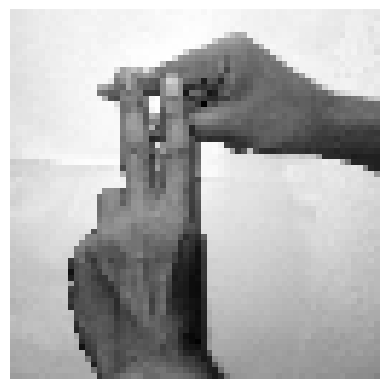

-----
Sample 6: True Label: খ, Predicted Label: খ


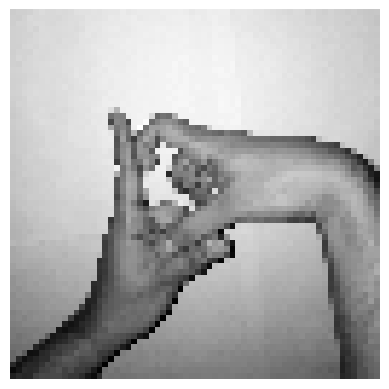

-----
Sample 7: True Label: ড, Predicted Label: ড


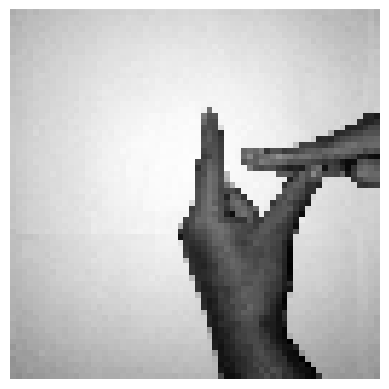

-----
Sample 8: True Label: ঃ, Predicted Label: ঃ


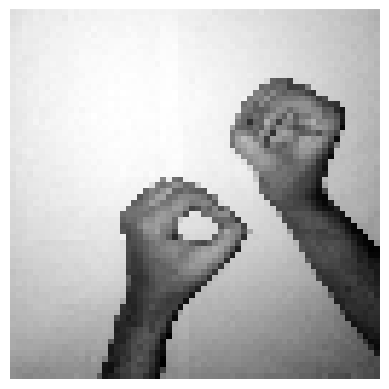

-----
Sample 9: True Label: ল, Predicted Label: ই


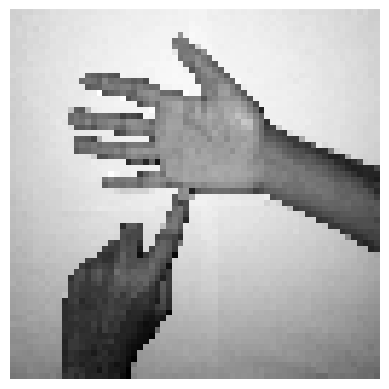

-----
Sample 10: True Label: গ, Predicted Label: গ


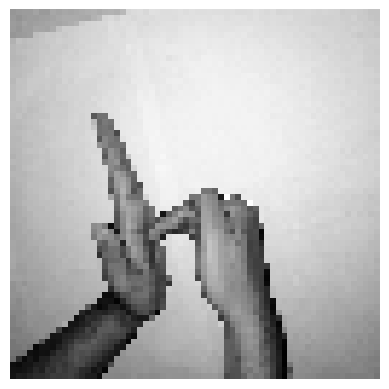

-----


In [16]:
import matplotlib.pyplot as plt

num_samples_to_predict = 10

sample_images = X_test[:num_samples_to_predict]
sample_labels = y_test[:num_samples_to_predict]

predictions = model.predict(sample_images)

predicted_labels = np.argmax(predictions, axis=1)
predicted_bangla_letter = [bangla_letters.get(label, "Unknown") for label in predicted_labels]

for i in range(num_samples_to_predict):
    print(f"Sample {i + 1}: True Label: {bangla_letters[sample_labels[i]]}, Predicted Label: {predicted_bangla_letter[i]}")
    
    plt.imshow(sample_images[i, :, :, 0], cmap='gray')
    plt.axis('off')
    plt.show()
    print("-----")


Sample 1: True Label: গ, Predicted Label: গ


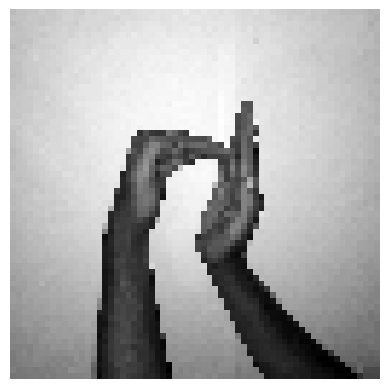

-----
Sample 2: True Label: ঘ, Predicted Label: ঘ


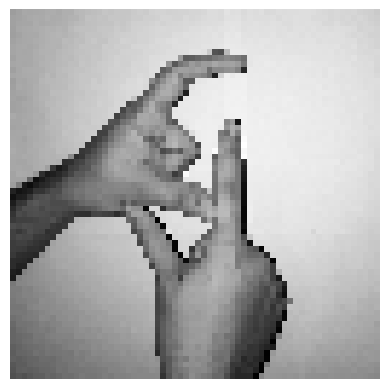

-----
Sample 3: True Label: হ, Predicted Label: হ


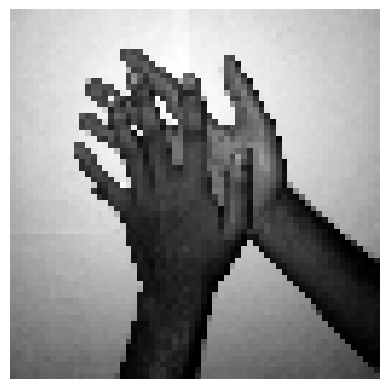

-----
Sample 4: True Label: জ, Predicted Label: জ


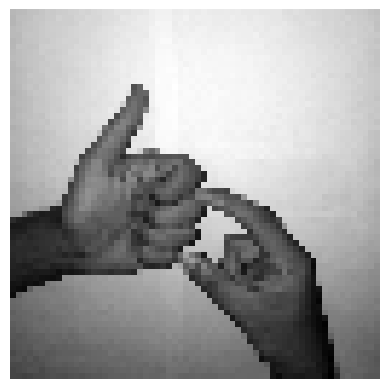

-----
Sample 5: True Label: ঝ, Predicted Label: ঝ


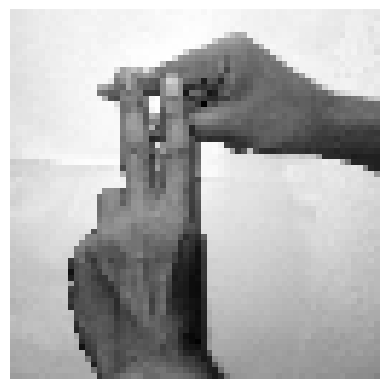

-----
Sample 6: True Label: খ, Predicted Label: খ


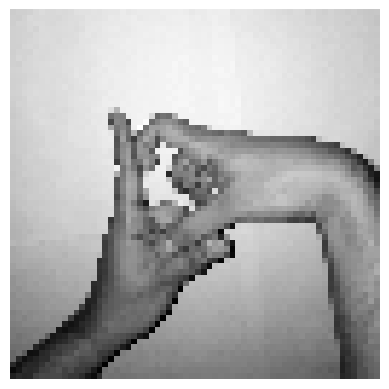

-----
Sample 7: True Label: ড, Predicted Label: ড


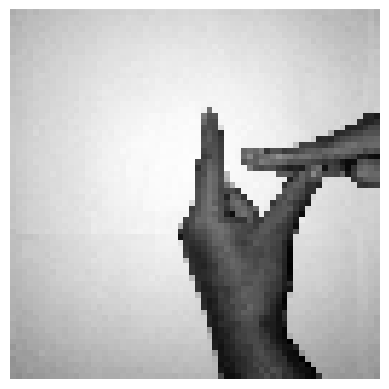

-----
Sample 8: True Label: ঃ, Predicted Label: ঃ


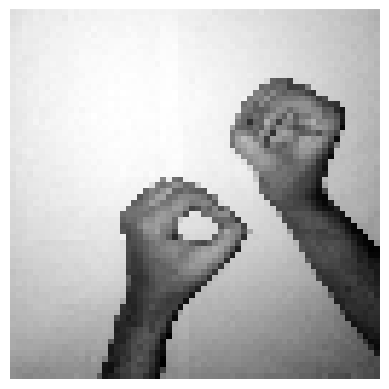

-----
Sample 9: True Label: ল, Predicted Label: ই


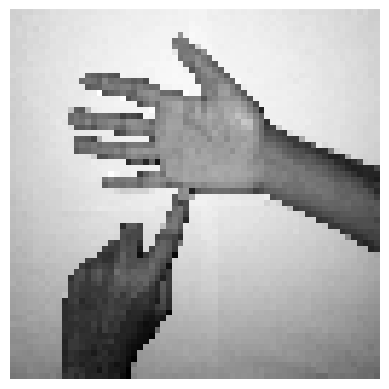

-----
Sample 10: True Label: গ, Predicted Label: গ


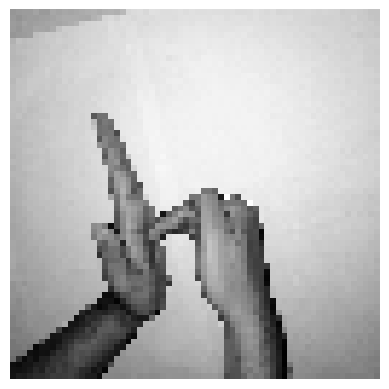

-----


In [17]:
for i in range(num_samples_to_predict):
    true_label = bangla_letters.get(sample_labels[i], "Unknown")
    predicted_label = predicted_bangla_letter[i]
    print(f"Sample {i + 1}: True Label: {true_label}, Predicted Label: {predicted_label}")
    
    plt.imshow(sample_images[i, :, :, 0], cmap='gray')
    plt.axis('off')
    plt.show()
    print("-----")
